In [1]:
%%capture
!pip install visualkeras

### Importando bibliotecas:

**import os**: Isso importa o módulo os, que fornece funções para interagir com o sistema operacional, permitindo manipular caminhos de arquivos, diretórios e outras operações relacionadas ao sistema.

**import tensorflow as tf**: Isso importa a biblioteca TensorFlow, uma plataforma de código aberto para machine learning e deep learning.

**import numpy as np**: Aqui, a biblioteca NumPy é importada com o apelido 'np'. O NumPy é usado para trabalhar com arrays multidimensionais e oferece várias funções matemáticas úteis para processamento de dados numéricos.

**import pandas as pd**: Isso importa a biblioteca pandas, que é amplamente usada para manipulação e análise de dados. O pandas fornece estruturas de dados como DataFrames, que facilitam a organização e a manipulação de dados tabulares.

**from sklearn.model_selection import StratifiedShuffleSplit**: Isso importa a classe StratifiedShuffleSplit do módulo model_selection da biblioteca scikit-learn (sklearn). O StratifiedShuffleSplit é uma técnica de divisão de dados usada principalmente para dividir conjuntos de dados em treinamento e teste de maneira estratificada, preservando as proporções das classes alvo.

In [2]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

Vamos utilizar a função load_data() do módulo cifar10 da biblioteca tf.keras.datasets para carregar o conjunto de dados CIFAR-10. O conjunto de dados CIFAR-10 é um conjunto padrão usado em visão computacional e consiste em imagens coloridas de 32x32 pixels divididas em 10 classes diferentes.

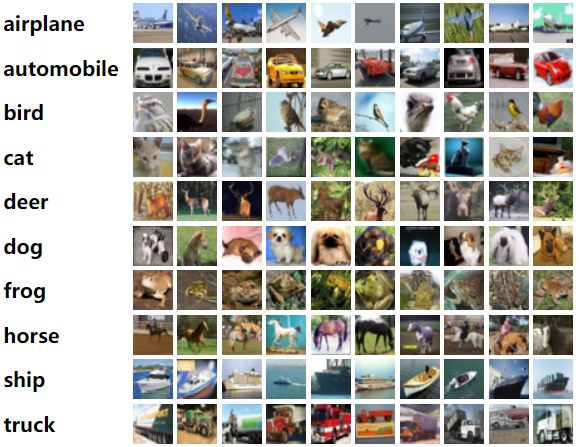

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


A normalização dos dados é uma etapa comum no pré-processamento de dados, especialmente em tarefas de aprendizado de máquina e deep learning. Neste caso iremos utilizar escala de cinza e assim reduzir o tempo de treinamento necessário.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train=np.dot(x_train[...,:3], [0.299, 0.587, 0.114])
x_test=np.dot(x_test[...,:3], [0.299, 0.587, 0.114])
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

 O conjunto de treinamento original é dividido em duas partes: uma para treinamento efetivo e outra para validação do modelo.

In [5]:
s = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index, valid_index = next(s.split(x_train, y_train))
x_valid, y_valid = x_train[valid_index], y_train[valid_index]
x_train, y_train = x_train[train_index], y_train[train_index]
print(x_train.shape, x_valid.shape, x_test.shape)

(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)


### Construindo a rede:

- A camada BatchNormalization normaliza os valores de entrada de cada batch durante o treinamento.
- A camada Conv2D é uma camada convolucional bidimensional, usada para realizar a convolução nas imagens de entrada.
- A camada MaxPooling2D realiza operações de pooling máximo nas saídas das camadas convolucionais.
- A camada Dropout é uma técnica de regularização que ajuda a prevenir o overfitting.
- A camada Flatten transforma os dados da saída das camadas convolucionais (que são matrizes tridimensionais) em um vetor unidimensional.
- A camada Dense é uma camada totalmente conectada (ou camada fully connected) onde todos os neurônios estão conectados a todos os neurônios da camada anterior.
- A camada Activation aplica uma função de ativação às saídas da camada anterior.

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

### Visualizando a rede:

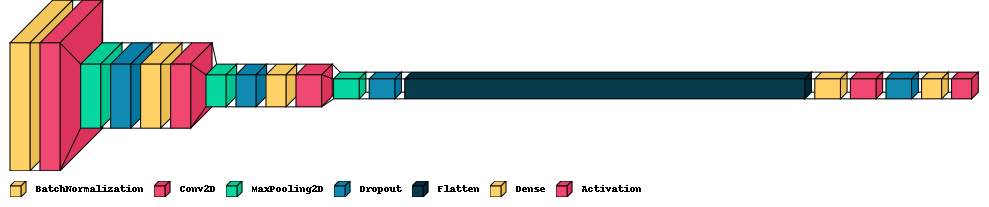

In [7]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

### Compilando e treinando o modelo:

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_valid, y_valid))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/10
326/326 [==============================] - 24s 28ms/step - loss: 2.3621 - accuracy: 0.2698 - val_loss: 7.7598 - val_accuracy: 0.1169
Epoch 2/10
326/326 [==============================] - 7s 22ms/step - loss: 1.6133 - accuracy: 0.4319 - val_loss: 1.2283 - val_accuracy: 0.5715
Epoch 3/10
326/326 [==============================] - 7s 23ms/step - loss: 1.2603 - accuracy: 0.5598 - val_loss: 1.0930 - val_accuracy: 0.6226
Epoch 4/10
326/326 [==============================] - 7s 22ms/step - loss: 1.0771 - accuracy: 0.6242 - val_loss: 0.9284 - val_accuracy: 0.6754
Epoch 5/10
326/326 [==============================] - 7s 22ms/step - loss: 0.9505 - accuracy: 0.6679 - val_loss: 0.8608 - val_accuracy: 0.7021
Epoch 6/10
326/326 [==============================] - 8s 26ms/step - loss: 0.8578 - accuracy: 0.7041 - val_loss: 0.8258 - val_accuracy: 0.7166
Epoch 7/10
326/326 [==============================] - 7s 22ms/step - loss: 0.7817 - accuracy: 0.7286 - val_loss: 0.8023 - val_accuracy: 0.726

### Visualizando algumas predições e a "confiança" do modelo:

1/1 [==============================] - 0s 122ms/step


<Figure size 400x300 with 0 Axes>

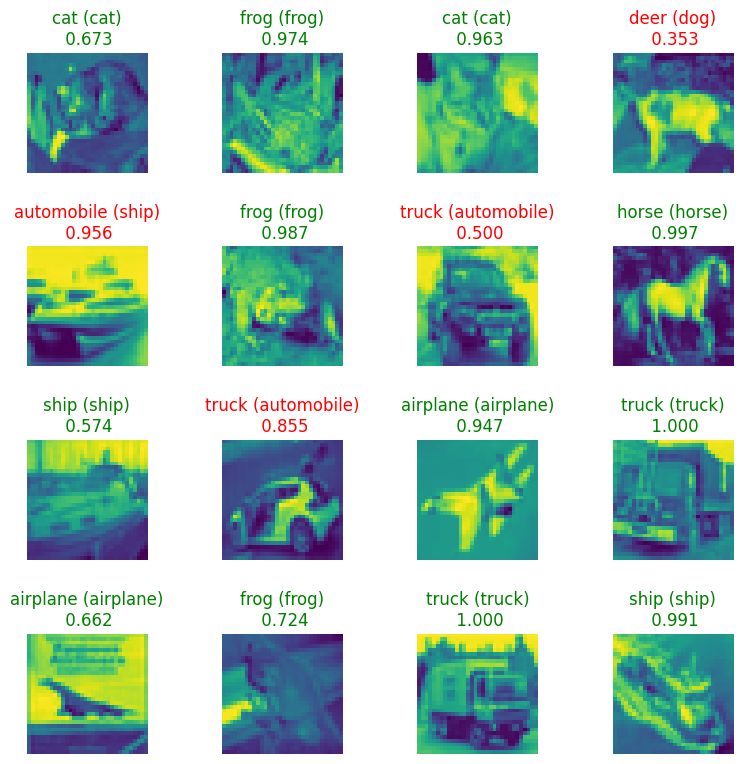

In [9]:
LABEL_NAMES=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions, true_labels):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  fig = pyplot.figure(figsize=(4,3))
  f, axes = pyplot.subplots(nc, 4)
  f.tight_layout()
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')

    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    pred_label = np.argmax(predictions[i])
    axes[x, y].set_title("{} ({})\n {:.3f}".format(
      LABEL_NAMES[pred_label],
      LABEL_NAMES[true_labels[i][0]],
      confidence
    ), color=("green" if true_labels[i] == pred_label else "red"))
  pyplot.gcf().set_size_inches(8, 8)

plot_predictions(
    np.squeeze(x_test[:16]),
    model.predict(x_test[:16]),
    y_test[:16]
)

### Avaliando o modelo no conjunto de validação:

In [10]:
%%time
# Evaluate the model on valid set
score = model.evaluate(x_valid, y_valid, verbose=0)

# Print test accuracy
print('\n', 'Valid accuracy:', score[1])


 Valid accuracy: 0.7321814298629761
CPU times: user 786 ms, sys: 107 ms, total: 893 ms
Wall time: 1 s


### Avaliando o modelo no conjunto de teste:

In [11]:
%%time
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7372999787330627
CPU times: user 934 ms, sys: 113 ms, total: 1.05 s
Wall time: 1.07 s


### Plotando os gráficos comparativos:

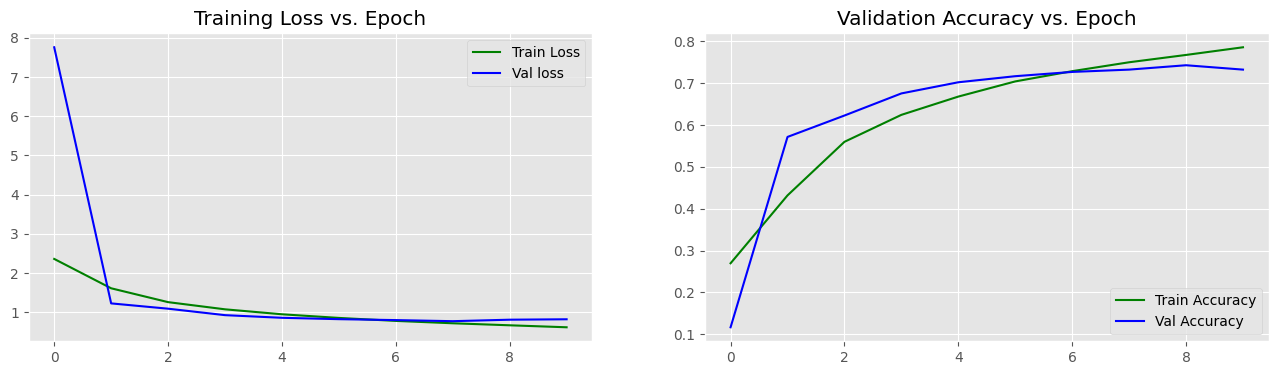

In [12]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (16, 4)
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Training Loss vs. Epoch')
ax2.set_title('Validation Accuracy vs. Epoch')

ax1.plot(history.history['loss'], color='green', label='Train Loss')
ax1.plot(history.history['val_loss'], color='blue', label='Val loss')

ax2.plot(history.history['accuracy'], color='green', label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], color='blue', label='Val Accuracy')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.show()
